# Arbol de decisión para especies de flores

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../datasets/iris/iris.csv')
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.shape

(150, 5)

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

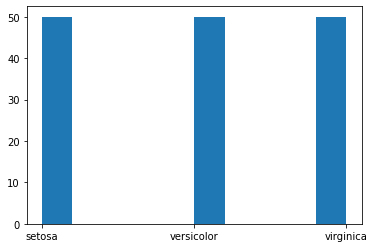

In [4]:
plt.hist(data.Species)

In [5]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
colnames = data.columns.values.tolist()
predictors = colnames[:4]
target = colnames[4]

In [7]:
import numpy as np

In [8]:
data['is_train'] = (np.random.uniform(0,1, len(data)) <= 0.75).astype(int)

(array([ 39.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 111.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

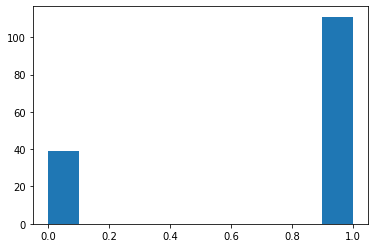

In [9]:
plt.hist(data.is_train)

In [10]:
train, test = data[data['is_train']==1], data[data['is_train']==0]

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
tree = DecisionTreeClassifier(criterion='entropy', min_samples_split=20, random_state=99)
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(criterion='entropy', min_samples_split=20,
                       random_state=99)

In [13]:
preds = tree.predict(test[predictors])

In [14]:
pd.crosstab(test[target], preds, rownames=['Actual'], colnames=['Predictions'])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,15,0,0
versicolor,0,7,0
virginica,0,3,14


## Visualización del árbol de decisión

In [15]:
from sklearn.tree import export_graphviz

In [16]:
with open('resources/iris_dtree.dot', 'w') as dotfile:
    export_graphviz(tree, out_file=dotfile, feature_names=predictors)

In [17]:
import os
from graphviz import Source

In [18]:
file = open('resources/iris_dtree.dot', 'r')
text = file.read()
file.close()

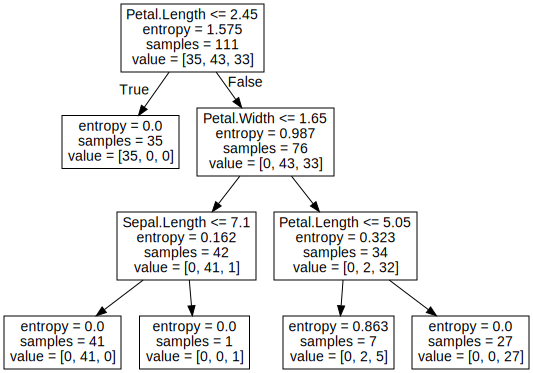

In [19]:
Source(text)

### Otra forma de hacerlo

In [20]:
from sklearn.tree import plot_tree

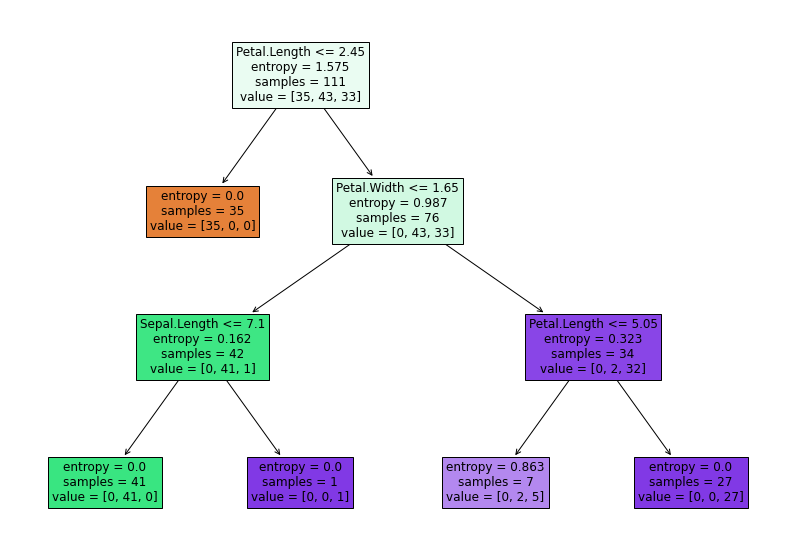

In [21]:
plt.figure(figsize=(14,10))

plot_tree(decision_tree=tree, feature_names=predictors, filled=True, fontsize=12)

plt.show()

## Cross Validation para la poda

In [22]:
X = data[predictors]
Y = data[target]

In [23]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20, random_state=99)
tree.fit(X, Y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20,
                       random_state=99)

In [24]:
from sklearn.model_selection import KFold

In [25]:
cv = KFold(n_splits=10, shuffle=True, random_state=1) #n_splits = 10 grupos de 15 flores

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
scores = cross_val_score(tree, X, Y, scoring='accuracy', cv = cv, n_jobs=1)
scores

array([1.        , 0.93333333, 0.93333333, 0.93333333, 1.        ,
       0.93333333, 1.        , 0.86666667, 0.93333333, 0.8       ])

In [28]:
score = np.mean(scores)

In [29]:
score

0.9333333333333333

In [30]:
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(X, Y)
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    scores = cross_val_score(tree, X, Y, scoring='accuracy', cv = cv, n_jobs=1)
    score = np.mean(scores)
    
    print('Score para i = ', i, "es de ", score)
    print('    ', tree.feature_importances_)

Score para i =  1 es de  0.5666666666666667
     [0. 0. 1. 0.]
Score para i =  2 es de  0.9200000000000002
     [0.         0.         0.66620285 0.33379715]
Score para i =  3 es de  0.9400000000000001
     [0.         0.         0.68976981 0.31023019]
Score para i =  4 es de  0.9333333333333333
     [0.         0.         0.66869158 0.33130842]
Score para i =  5 es de  0.9333333333333333
     [0.         0.         0.66869158 0.33130842]
Score para i =  6 es de  0.9333333333333333
     [0.         0.         0.66869158 0.33130842]
Score para i =  7 es de  0.9333333333333333
     [0.         0.         0.66869158 0.33130842]
Score para i =  8 es de  0.9333333333333333
     [0.         0.         0.66869158 0.33130842]
Score para i =  9 es de  0.9333333333333333
     [0.         0.         0.66869158 0.33130842]
Score para i =  10 es de  0.9333333333333333
     [0.         0.         0.66869158 0.33130842]


In [31]:
predictors

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

# Random Forest - Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
forest = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators = 101)
forest.fit(X,Y)

RandomForestClassifier(n_estimators=101, n_jobs=2, oob_score=True)

In [36]:
forest.oob_decision_function_

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.97674419, 0.02325581, 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.

In [37]:
forest.oob_score_

0.96